# **Introduction**
This notebook explores a [dataset](https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024) of 1.3 Million job postings sourced from LinkedIn which posted in 2024, aiming to uncover trends in job titles, locations and employment types. As LinkedIn is one of the largest professional networking platforms, its job postings data provides a comprehensive view of the current job market.


# **Load libraries and data**

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = kagglehub.dataset_download("asaniczka/1-3m-linkedin-jobs-and-skills-2024")

100%|██████████| 1.88G/1.88G [00:32<00:00, 62.0MB/s]

Extracting files...


In [3]:
jobs_df = pd.read_csv(path+'/linkedin_job_postings.csv')

In [4]:
skills_df = pd.read_csv(path+'/job_skills.csv')

# **Explore the data**

In [5]:
jobs_df.dtypes

,0
job_link,object
last_processed_time,object
got_summary,object
got_ner,object
is_being_worked,object
job_title,object
company,object
job_location,object
first_seen,object
search_city,object


In [6]:
skills_df.dtypes

,0
job_link,object
job_skills,object


In [7]:
jobs_df.isna().sum()

,0
job_link,0
last_processed_time,0
got_summary,0
got_ner,0
is_being_worked,0
job_title,0
company,11
job_location,19
first_seen,0
search_city,0


In [8]:
jobs_df.duplicated().sum()

0

In [9]:
jobs_df

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348449,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite
1348450,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite
1348451,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite
1348452,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite


In [10]:
jobs_df.job_level.value_counts()

,count
job_level,
Mid senior,1204445
Associate,144009


In [11]:
skills_df.isna().sum()

,0
job_link,0
job_skills,2085


In [12]:
skills_df.duplicated().sum()

0

In [13]:
skills_df['N_skills'] = skills_df.job_skills.str.count(',')

We can see that some of the jobs posted in LinkedIn have no skills mentioned for the roles. It is seen by both the differences between the jobs_df which has more unique rows and with the skills_df which has about 2K Nas.


---

Next, We will count the number of skills required for each job

In [14]:
skills_df

,job_link,job_skills,N_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor...",13.0
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ...",18.0
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis...",19.0
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche...",34.0
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St...",10.0
...,...,...,...
1296376,https://www.linkedin.com/jobs/view/community-a...,"Communication Skills, Time Management, Custome...",8.0
1296377,https://www.linkedin.com/jobs/view/sr-it-analy...,"Windows SQL, EDI X12, Edifecs Platform, Health...",25.0
1296378,https://www.linkedin.com/jobs/view/operations-...,"Adaptability, Communication, Digital Fluency, ...",16.0
1296379,https://www.linkedin.com/jobs/view/float-patie...,"CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R...",31.0


We can see that there are some jobs that require a very large number of skills, however they are not that many, so we will not use them in this analysis.


---


Looking for distribution of number of skills required

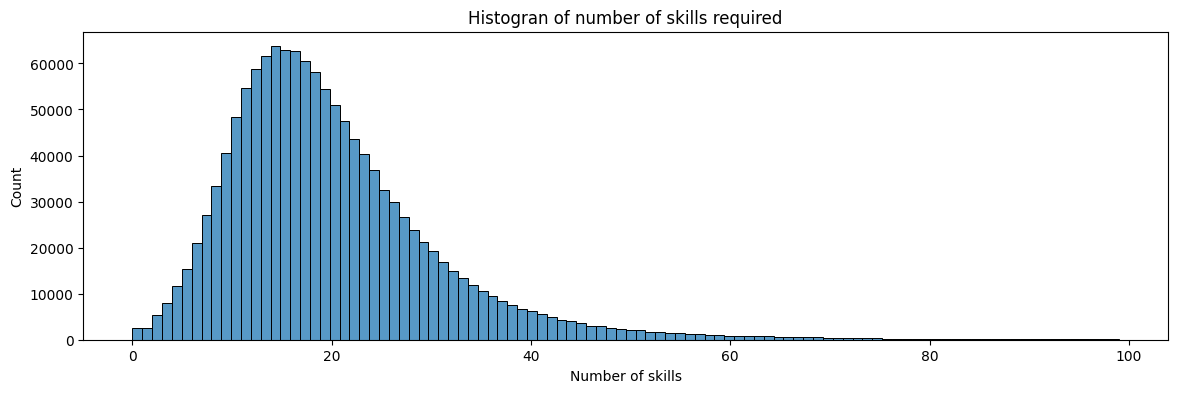

In [15]:
skills_df = skills_df[skills_df.N_skills < 100]

fig = plt.figure(figsize=(14, 4))
sns.histplot(skills_df.N_skills, bins = 100)
plt.title('Histogran of number of skills required')
plt.xlabel('Number of skills')
plt.show()

In [16]:
# Merging left for keeping jobs with no skills description to look for trends there.
merged = pd.merge(jobs_df, skills_df, on = 'job_link', how = 'left')

In [17]:
merged.isna().sum()

,0
job_link,0
last_processed_time,0
got_summary,0
got_ner,0
is_being_worked,0
job_title,0
company,11
job_location,19
first_seen,0
search_city,0


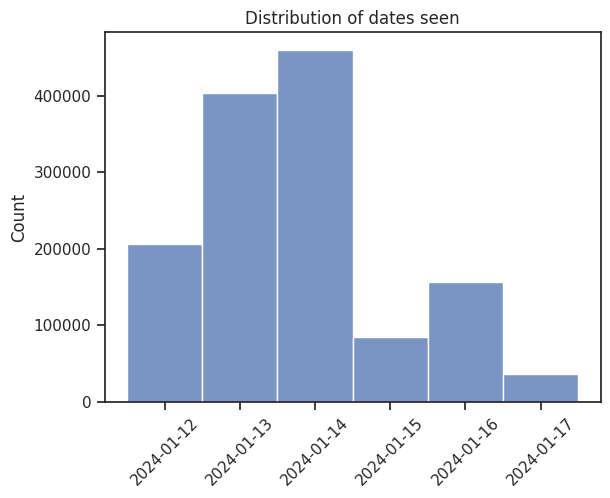

In [74]:
sns.histplot(merged['first_seen'].sort_values())
plt.xticks(rotation = 45)
plt.title('Distribution of dates seen')
plt.xlabel('')
plt.show()

# **Clean and organize the Data**

In [18]:
jobs_with_skills = merged.dropna()

We will need to standaridize the job_title so when grouping by this column, the grouping will not consider digits and different irrelevant symbols. The goal is that the title "#324 Data analyst" will be grouped with title called "DATA ANALYST"

In [19]:
# Drop duplicates
jobs_with_skills = jobs_with_skills[~jobs_with_skills.iloc[:,5:].duplicated()]

Standaridize the job_title column

In [20]:
jobs_with_skills['job_title'] = jobs_with_skills['job_title'].str.replace(r'[^\w\s\-/,&]', '', regex=True) # Remove all unwanted symbols from job title
jobs_with_skills['job_title'] = jobs_with_skills['job_title'].str.replace(r'\d+', '', regex=True) # Remove all digits from job title
jobs_with_skills['job_title'] = jobs_with_skills['job_title'].str.title() # Standardize all letter to start with capital letter

Create column for seniority level (Entry, Junior, Lead, Senior) if exist in job_title

In [21]:
jobs_with_skills['level'] = ''
jobs_with_skills.loc[jobs_with_skills['job_title'].str.contains('entry', case=False),'level'] = 'Entry'
Regex_Jr = r'\b(Junior|Jr\.|Jr)\b'
jobs_with_skills.loc[jobs_with_skills['job_title'].str.contains(Regex_Jr, regex=True),'level'] = 'Junior'
Regex_Sr = r'\b(Senior|Sr\.|Sr)\b'
jobs_with_skills.loc[jobs_with_skills['job_title'].str.contains(Regex_Sr, regex=True),'level'] = 'Senior'
jobs_with_skills.loc[jobs_with_skills['job_title'].str.contains('lead', case=False),'level'] = 'Lead'

<ipython-input-21-8a5ce3b887a2>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  jobs_with_skills.loc[jobs_with_skills['job_title'].str.contains(Regex_Jr, regex=True),'level'] = 'Junior'
<ipython-input-21-8a5ce3b887a2>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  jobs_with_skills.loc[jobs_with_skills['job_title'].str.contains(Regex_Sr, regex=True),'level'] = 'Senior'


In [22]:
jobs_with_skills['level'].value_counts()

,count
level,
,1102263
Senior,116761
Lead,69259
Entry,2221
Junior,2182


It looks like the vast majority of roles don't spesify if it is a senior, lead or junior roles.  
in the source of the data, it was mentioned that the roles are for mid-senior levels, however the vast majority are non spesified, and there are also some Junior and Entry level roles in the data.

In [23]:
## Standaridize the values in the df - Senior data analyst = Sn. Data Analyst
jobs_with_skills['job_title'] = jobs_with_skills['job_title'].str.strip()
jobs_with_skills['job_title'] = jobs_with_skills['job_title'].str.replace('Sr ', 'Senior ')

Next, since most of the jobs are in the US, I will also analyze the skills and positions by state,, so I will create a separate column for states (if in the job is in the US)

In [24]:
jobs_with_skills['state'] = ''
jobs_with_skills['state'] = jobs_with_skills.job_location.str.split(',').str[1]

It looks like there are some jobs posted which located not in the US, Canada, England or Australia, so I will remove them.  
Moreover, the state sometimes appears as the state code, but sometimes not. So I will need to fix it and make them all codes.

In [25]:
# State names and codes
states = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

# Invert the dictionary to map names to codes as well
states_reversed = {v: k for k, v in states.items()}
states.update(states_reversed)

# Function to check and replace state name or code with the code
def replace_with_state_code(text):
    # Check if the text is a string before proceeding
    if isinstance(text, str):
        for key, value in states_reversed.items():
            if key in text:
                return value  # Return the state code
    return text  # If no match or not a string, return the original text

# Apply the function to the column
jobs_with_skills['state'] = jobs_with_skills['state'].apply(replace_with_state_code)

# **Grouping, aggregating and analyzing**


## Analysis of job titles

In [26]:
title_grouped = jobs_with_skills.groupby('job_title').agg(job_skills=('job_skills', ', '.join),
                                                       n = ('job_title','size'),
                                                       avg_N_skills = ('N_skills','mean')).reset_index()

Count the number of occurences for each skill

In [27]:
from collections import Counter

title_grouped['counted_skills'] = ''
title_grouped['prop_counted_skills'] = ''
title_grouped['counted_skills'] = title_grouped['job_skills'].apply(lambda x: Counter(x.split(',')).most_common(50))

Find the percentage of skill demand for each job title

In [28]:
for index in title_grouped[(title_grouped['job_title'].str.contains(r'(Senior |Lead |)Data Analyst', regex = True))].index:  # Iterate through the DataFrame's index
    job_title = title_grouped.loc[index, 'job_title']  # Get the job_title for the current row
    n_title = title_grouped[title_grouped['job_title'] == job_title]['n'].iloc[0] # Get the number of occurences of the job_title
    skills = title_grouped[title_grouped['job_title'] == job_title]['counted_skills']  # Get a list of all the skills
    prop_counted_skills = [] # Create a new list for skill proportions
    for skill in skills:
      for j in skill:  # Iterate over all the skills
        prop_counted_skills.append((j[0], (j[1]*100)/n_title))
    title_grouped.at[index, 'prop_counted_skills'] = prop_counted_skills

<ipython-input-28-24c7a52340ae>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  for index in title_grouped[(title_grouped['job_title'].str.contains(r'(Senior |Lead |)Data Analyst', regex = True))].index:  # Iterate through the DataFrame's index


## Analysis of seniority level

Look for average number of skills required for different seniority levels

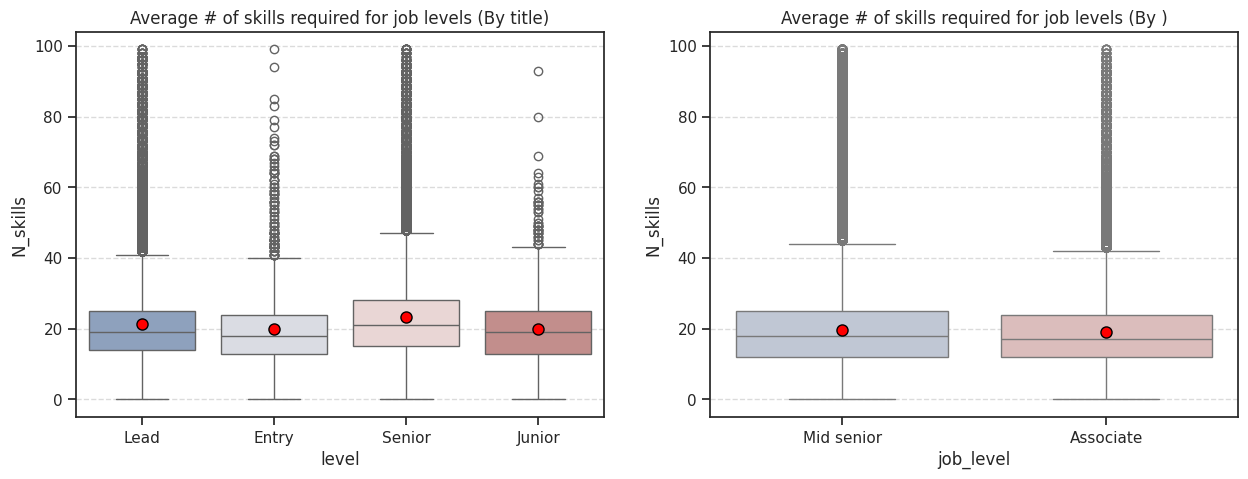

In [29]:
sns.set_theme(style="ticks")

fig, axes = plt.subplots(1, 2, figsize = (15,5))

levels = ['Entry', 'Junior', 'Lead', 'Senior']
sns.boxplot(data = jobs_with_skills[jobs_with_skills.level.isin(levels)], x = 'level',hue = 'level',
            y = 'N_skills', fill = True, palette="vlag", showmeans=True, ax = axes[0],
            meanprops={"marker":"o",
                       "markerfacecolor":"red",
                       "markeredgecolor":"black",
                       "markersize":8})
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_title('Average # of skills required for job levels (By title)')

sns.boxplot(data = jobs_with_skills, x = 'job_level',hue = 'job_level',
            y = 'N_skills', fill = True, palette="vlag", showmeans=True, ax = axes[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"red",
                       "markeredgecolor":"black",
                       "markersize":8})
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_title('Average # of skills required for job levels (By )')

plt.show()

We can see in the results that there is no significant effect in the number of skills required for different job levels. A small effect is visible for the "Senior" level, requring slightly more skills on average

Plot an example of the counts of the skills needed for a data analysis job title.

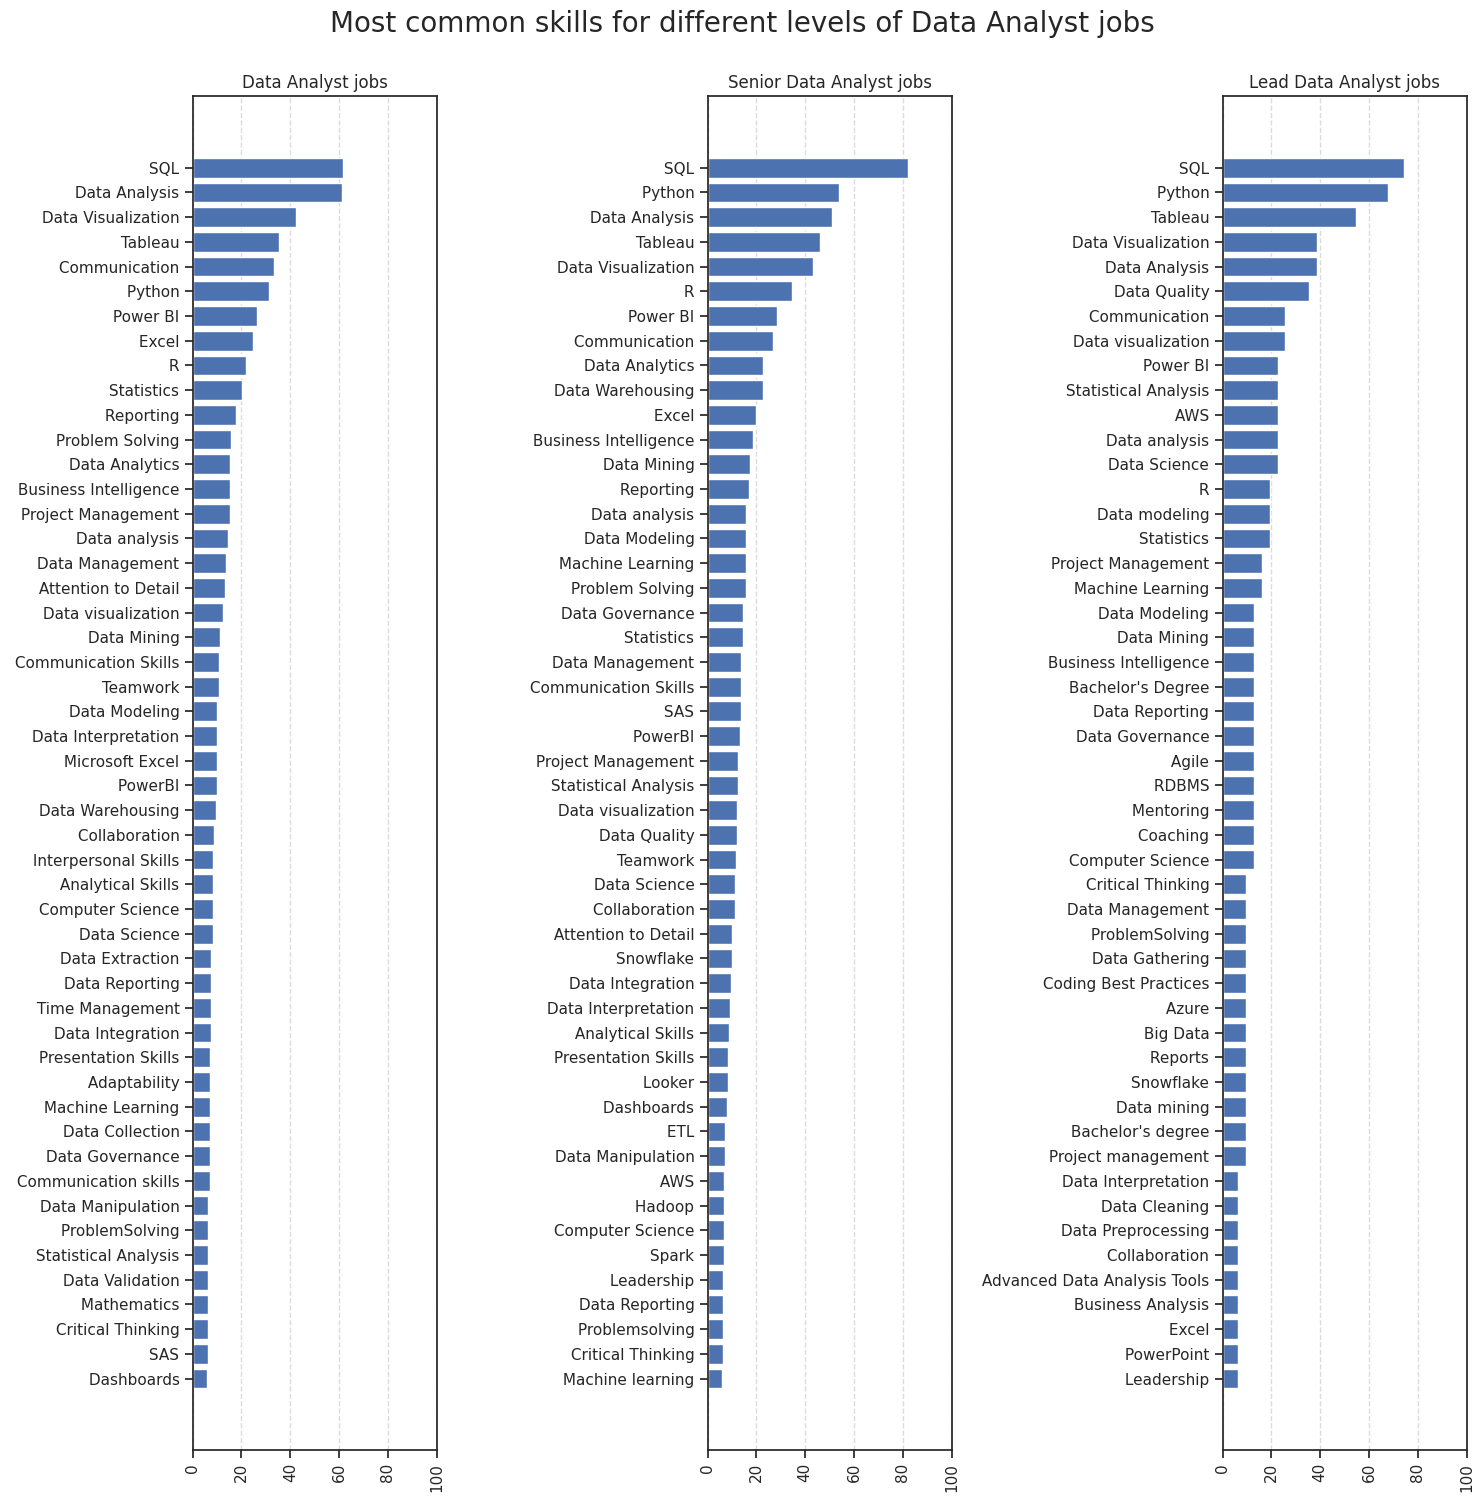

In [30]:
from matplotlib import gridspec

fig, ax = plt.subplots(1, 3, figsize = (15,15))

plt.suptitle('Most common skills for different levels of Data Analyst jobs', x = 0.5, y = 1, fontsize = 20)

x, y = zip(*title_grouped.loc[title_grouped['job_title'] == "Data Analyst",'prop_counted_skills'].iloc[0])
x1, y1 = zip(*title_grouped.loc[title_grouped['job_title'] == "Senior Data Analyst",'prop_counted_skills'].iloc[0])
x2, y2 = zip(*title_grouped.loc[title_grouped['job_title'] == "Lead Data Analyst",'prop_counted_skills'].iloc[0])

ax[0].barh(x, y)
ax[0].tick_params(axis = 'x', rotation=90)
ax[0].grid(axis='x', linestyle='--', alpha=0.7)
ax[0].invert_yaxis() # Make sure that the highest values are on top
ax[0].set_xlim(0,100)
ax[0].set_title('Data Analyst jobs')

ax[1].barh(x1, y1)
ax[1].tick_params(axis = 'x', rotation=90)
ax[1].grid(axis='x', linestyle='--', alpha=0.7)
ax[1].invert_yaxis() # Make sure that the highest values are on top
ax[1].set_xlim(0,100)
ax[1].set_title('Senior Data Analyst jobs')

ax[2].barh(x2, y2)
ax[2].tick_params(axis = 'x', rotation=90)
ax[2].grid(axis='x', linestyle='--', alpha=0.7)
ax[2].invert_yaxis() # Make sure that the highest values are on top
ax[2].set_xlim(0,100)
ax[2].set_title('Lead Data Analyst jobs')

plt.tight_layout()
plt.show()

In the Data Analyst roles, we can see that there is high increase in the demand for SQL and Python skills for the senior roles vs. the junior roles.
We can see that there is around 80% demand of SQL for senior jobs, while only around 60% for junior ones.  
Moreover, we can see that the demand for Python doubled from 25% to 50% for these roles.

Most common skills per level

In [31]:
level_grouped = jobs_with_skills.groupby('level').agg(job_skills=('job_skills', ', '.join),
                                                       n = ('job_level','size'),
                                                       avg_N_skills = ('N_skills','mean')).reset_index()

level_grouped['counted_skills'] = ''
level_grouped['counted_skills'] = level_grouped['job_skills'].apply(lambda x: Counter(x.split(',')).most_common(10))

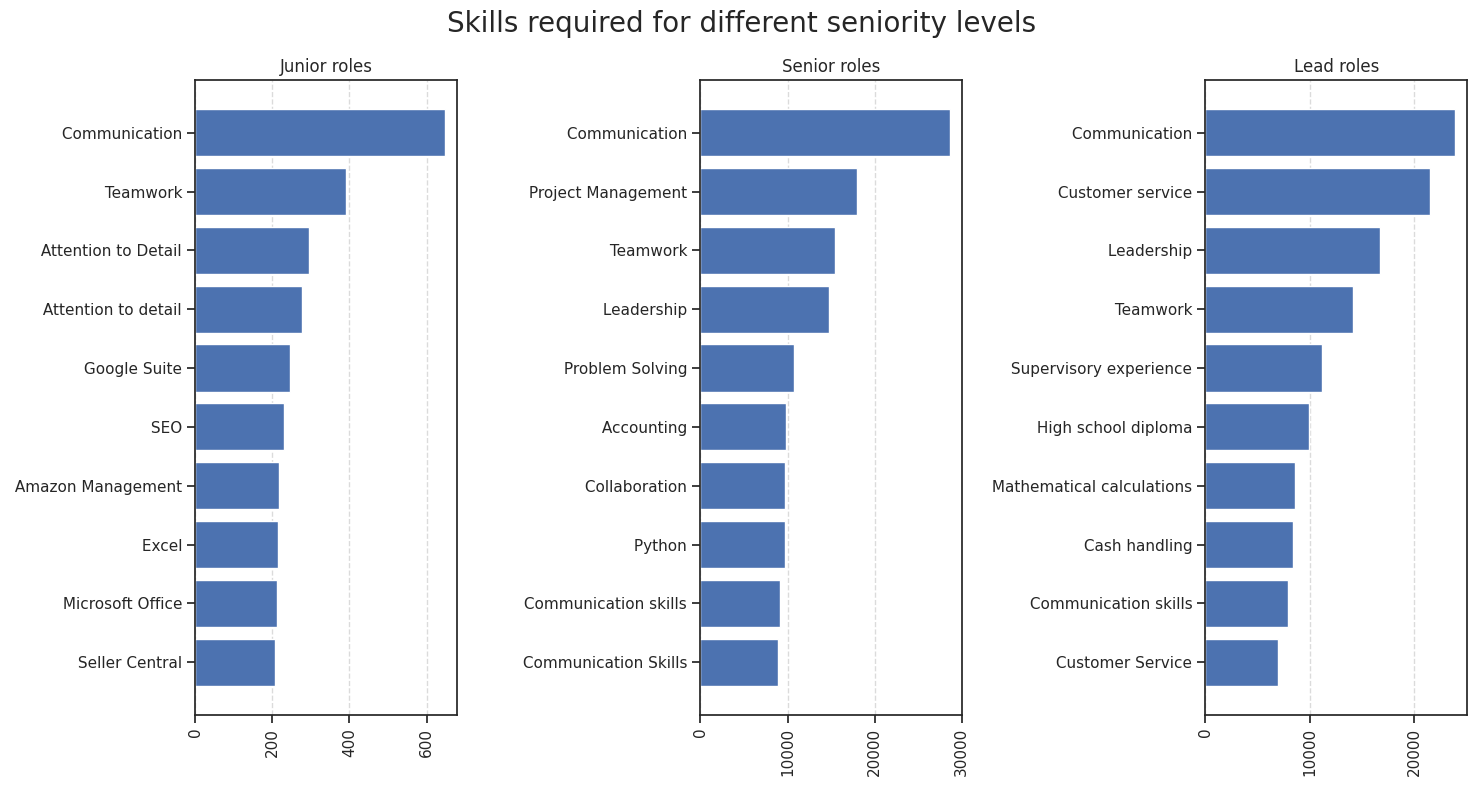

In [66]:
fig, ax = plt.subplots(1, 3, figsize = (15,8))

x, y = zip(*level_grouped.loc[level_grouped['level'] == "Junior",'counted_skills'].iloc[0])
x1, y1 = zip(*level_grouped.loc[level_grouped['level'] == "Senior",'counted_skills'].iloc[0])
x2, y2 = zip(*level_grouped.loc[level_grouped['level'] == "Lead",'counted_skills'].iloc[0])


ax[0].barh(x, y)
ax[0].tick_params(axis = 'x', rotation=90)
ax[0].grid(axis='x', linestyle='--', alpha=0.7)
ax[0].invert_yaxis() # Make sure that the highest values are on top
ax[0].set_title('Junior roles')

ax[1].barh(x1, y1)
ax[1].tick_params(axis = 'x', rotation=90)
ax[1].grid(axis='x', linestyle='--', alpha=0.7)
ax[1].invert_yaxis() # Make sure that the highest values are on top
ax[1].set_title('Senior roles')

ax[2].barh(x2, y2)
ax[2].tick_params(axis = 'x', rotation=90)
ax[2].grid(axis='x', linestyle='--', alpha=0.7)
ax[2].invert_yaxis() # Make sure that the highest values are on top
ax[2].set_title('Lead roles')

plt.suptitle('Skills required for different seniority levels', size = 20)
plt.tight_layout()
plt.show()

There are some interesting insights from this plots. It looks like there are some skills that required for all roles like communication and teamwork.   
We can also see that the senior and lead roles ask for different skills that junior roles don't, such as project managment for seniors, or supervisory experience for lead roles.
The skill of leadership is very important for senior roles in comparison to junior.

## Analysis of countries and states

Analyze by country

In [33]:
country_grouped = jobs_with_skills.groupby(['search_country','job_title']).agg(job_skills=('job_skills', ', '.join),
                                                       n = ('search_country','size'),
                                                       avg_N_skills = ('N_skills','mean')).reset_index()

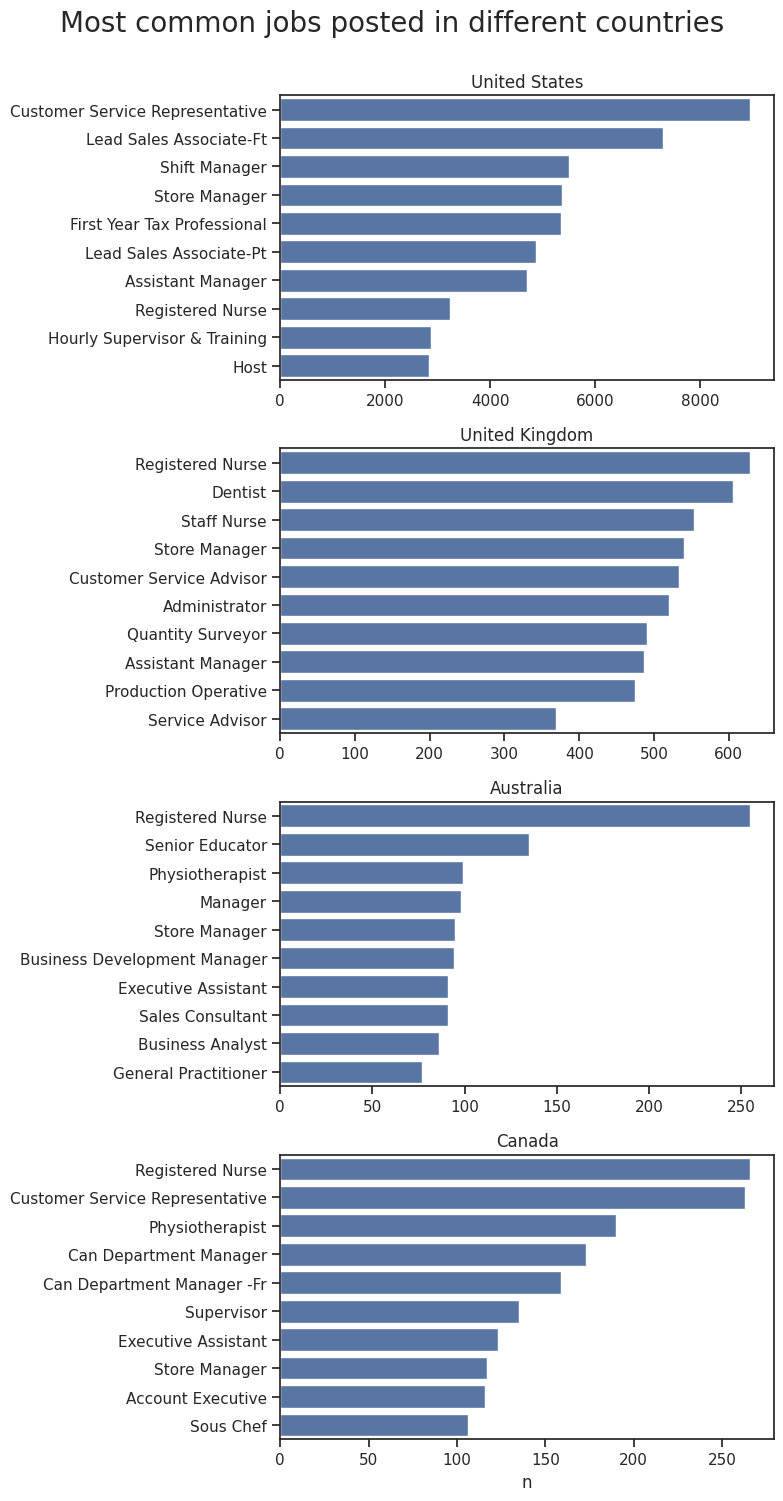

In [53]:
country_grouped = country_grouped[country_grouped['rank'] <= 10].sort_values(by = ['search_country','rank'])
fig, axes = plt.subplots(4, 1, figsize = (8,15))

sns.barplot(data = country_grouped[country_grouped['search_country'] == 'United States'], x = 'n', y = 'job_title', ax = axes[0])
sns.barplot(data = country_grouped[country_grouped['search_country'] == 'United Kingdom'], x = 'n', y = 'job_title', ax = axes[1])
sns.barplot(data = country_grouped[country_grouped['search_country'] == 'Australia'], x = 'n', y = 'job_title', ax = axes[2])
sns.barplot(data = country_grouped[country_grouped['search_country'] == 'Canada'], x = 'n', y = 'job_title', ax = axes[3])

axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[2].set_ylabel('')
axes[2].set_xlabel('')
axes[3].set_ylabel('')
axes[0].set_title('United States')
axes[1].set_title('United Kingdom')
axes[2].set_title('Australia')
axes[3].set_title('Canada')

plt.suptitle('Most common jobs posted in different countries', x = 0.5, y = 1, fontsize = 20)

plt.tight_layout()
plt.show()

In [58]:
total_country_grouped = jobs_with_skills.groupby('search_country').agg(n = ('search_country','size')).reset_index()

# Assign estimated population to each country (Approximation at the beginning of 2024)
total_country_grouped['total_pop'] = ''
total_country_grouped.loc[total_country_grouped['search_country'] == 'United States', 'total_pop'] = 334000000
total_country_grouped.loc[total_country_grouped['search_country'] == 'Canada', 'total_pop'] = 40000000
total_country_grouped.loc[total_country_grouped['search_country'] == 'Australia', 'total_pop'] = 26300000
total_country_grouped.loc[total_country_grouped['search_country'] == 'United Kingdom', 'total_pop'] = 69100000
total_country_grouped['pop/jobs'] = total_country_grouped['total_pop']/total_country_grouped['n']

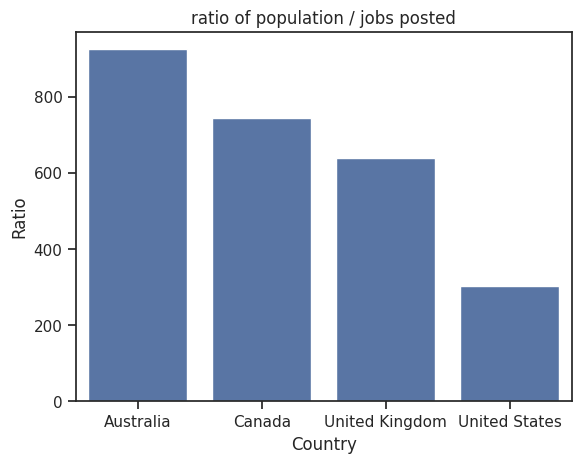

In [64]:
sns.barplot(x = 'search_country', y = 'pop/jobs', data = total_country_grouped)
plt.title('ratio of population / jobs posted')
plt.ylabel('Ratio')
plt.xlabel('Country')
plt.show()

We can see some significant differences in the jobs that posted in each country. While the US has about 300 people for each job posted, in Australia there are about 900 people for every job.  
It can also explain the previous plots of the most common jobs posted in each country. It looks like in the US Linkedin is a platform for all jobs, including sales persons and customer service, while in the other countries, these roles are less posted in there.

Analyze by states

In [37]:
US_df = jobs_with_skills[jobs_with_skills['search_country'] == 'United States']
US_df['state'] = US_df['state'].str.strip()
states_grouped = US_df.groupby(['state'])['state'].count().reset_index(name='count')

<ipython-input-37-28d2ea621f2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_df['state'] = US_df['state'].str.strip()


In [38]:
# Population estimation of US states for the beginning of 2024
us_states_population = {
    "AL": 5030053,
    "AK": 736081,
    "AZ": 7278717,
    "AR": 3017825,
    "CA": 38668833,
    "CO": 5807719,
    "CT": 3607684,
    "DE": 1011381,
    "FL": 22343347,
    "GA": 11031329,
    "HI": 1448505,
    "ID": 1932067,
    "IL": 12587530,
    "IN": 6843542,
    "IA": 3196141,
    "KS": 2939455,
    "KY": 4512569,
    "LA": 4622268,
    "ME": 1378703,
    "MD": 6205015,
    "MA": 7016533,
    "MI": 10125078,
    "MN": 5731213,
    "MS": 2944665,
    "MO": 6159467,
    "MT": 1130024,
    "NE": 1977016,
    "NV": 3248762,
    "NH": 1394305,
    "NJ": 9314420,
    "NM": 2100917,
    "NY": 19871905,
    "NC": 10641177,
    "ND": 780077,
    "OH": 11772544,
    "OK": 4032977,
    "OR": 4248637,
    "PA": 12993183,
    "RI": 1106095,
    "SC": 5262092,
    "SD": 912199,
    "TN": 7028325,
    "TX": 30420603,
    "UT": 3363953,
    "VT": 648879,
    "VA": 8654139,
    "WA": 7797097,
    "WV": 1781860,
    "WI": 5892682,
    "WY": 581381
}

states_grouped['total_pop'] = states_grouped['state'].map(us_states_population)
states_grouped['pop/jobs'] = states_grouped['total_pop']/states_grouped['count']
states_grouped = states_grouped.dropna()

Text(0.5, 1.0, 'Population vs. ratio of population / jobs posted')

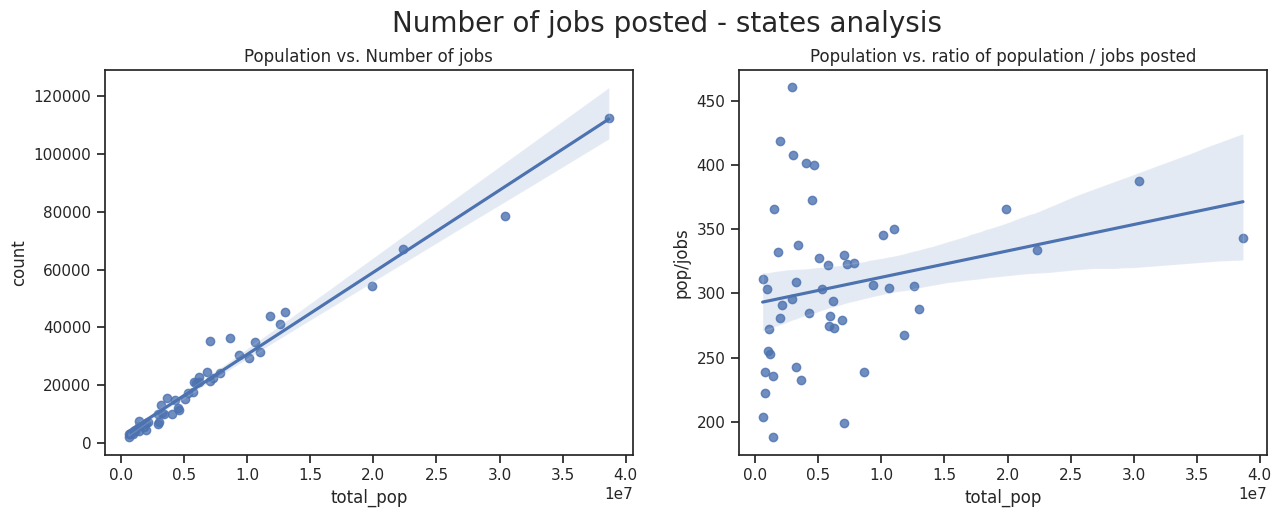

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Number of jobs posted - states analysis', x = 0.5, y = 1, fontsize = 20)
sns.regplot(x='total_pop', y='count', data=states_grouped, line_kws={"color": "b"}, ax = axes[0])
sns.regplot(x='total_pop', y='pop/jobs', data=states_grouped, line_kws={"color": "b"}, ax = axes[1])
axes[0].set_title("Population vs. Number of jobs")
axes[1].set_title("Population vs. ratio of population / jobs posted")

The results here show that there is a small effect of population size, where states with bigger population have on average more people for each job posted. It is interesting, however there could be different reasons for that, and further analysis needed

# **Conclusion and insights**

This analysis provides insights into job market trends on LinkedIn, revealing:
- **Skill Requirements Analysis:** Analysis of skill requirements shows how seniority level affects both the number of skills required and the type of skills.
- **Job Title Frequency:** The most common job titles reflect high-demand roles and vary acrros locations, based on type use of Linkedin. as example, in the US there are much more posts of sales and customer service, implying that in the US the use of Linkedin is more common accross all jobs.
- **Location Trends:** Certain countries or states show a high concentration of job opportunities, highlighting geographic hotspots for employment or different types of use in the job market.

Overall, this initial exploration gives a snapshot of demand by role and location, helping to understand key trends in LinkedIn's job market data.

### Further Analysis Suggestions
1. **Time-Series Analysis:** Track changes in job postings over time to identify seasonal trends or emerging roles.
3. **Salary Estimation (if applicable):** Estimate salary ranges by role and location to provide a more detailed picture of job market conditions.
4. **Company-Level Analysis:** Assess which companies have the most openings and the types of roles they prioritize to see potential hiring patterns or expansions.

These additional analyses could deepen insights, making this data valuable for job seekers, career advisors, or companies aiming to understand the competitive landscape.